In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

In [2]:
df = pd.read_csv('production.csv', sep =';')
df.head()

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1.0,1,1,103.0,0.0,harpy.co
1,1.0,1,2,0.0,2.0,harpy.co
2,1.0,1,3,0.0,4.0,harpy.co
3,1.0,1,4,0.0,5.0,harpy.co
4,1.0,1,5,0.0,13.0,harpy.co


In [3]:
df.loc[[1463], ['defects']] = 0.0
df['defects'] = df['defects'].astype('float')
df.dtypes

unsullen.id        float64
production.date      int64
report.date          int64
produced           float64
defects            float64
supplier            object
dtype: object

In [4]:
def a2(b): return "%.2f" % (b)
def a0(b): return "%.0f" % (b)

## 1. Количество произведенных и сломанных мечей за все время

Количество произведенных мечей кузнецами Harpy.co = 31532
Количество дефектных мечей кузнецов Harpy.co = 6080
В процентном отношении от общего числа = 19.28 %

Количество произведенных мечей кузнецами Westeros.inc = 31625
Количество дефектных мечей кузнецов Westeros.inc = 8269
В процентном отношении от общего числа = 26.15 %



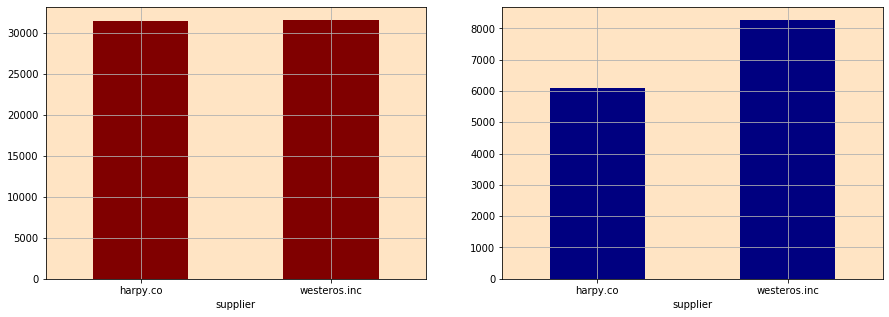

In [5]:
harpy_df = df.loc[df['supplier'] == 'harpy.co']
westeros_df = df.loc[df['supplier'] == 'westeros.inc']

harpy_pr = harpy_df['produced'].sum()
harpy_def = harpy_df['defects'].sum()
westeros_pr = westeros_df['produced'].sum()
westeros_def = westeros_df['defects'].sum()

print('Количество произведенных мечей кузнецами Harpy.co =', int(harpy_pr))
print('Количество дефектных мечей кузнецов Harpy.co =', int(harpy_def))
print('В процентном отношении от общего числа =', float("{0:.2f}".format(harpy_def/harpy_pr*100)), '%\n')
print('Количество произведенных мечей кузнецами Westeros.inc =', int(westeros_pr))
print('Количество дефектных мечей кузнецов Westeros.inc =', int(westeros_def))
print('В процентном отношении от общего числа =', float("{0:.2f}".format(westeros_def/westeros_pr*100)), '%\n')

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.set(facecolor='bisque')
ax2.set(facecolor='bisque')
df1 = df.groupby(['supplier'])['produced'].sum()
df2 = df.groupby(['supplier'])['defects'].sum()
df1.plot.bar(width=0.5, rot=0, ax=ax1, facecolor='maroon', grid=True)
df2.plot.bar(width=0.5, rot=0, ax=ax2, facecolor='navy', grid=True)
plt.show()

## 2. Количество произведенных и сломанных мечей за месяц

   Harpy.co prod  Westeros.inc prod  Harpy.co def  Westeros.inc def
0         5248.0             5280.0        2355.0            2187.0
1         5256.0             5272.0        1798.0            1945.0
2         5243.0             5298.0        1134.0            1657.0
3         5282.0             5285.0         408.0            1211.0
4         5243.0             5263.0         258.0             832.0
5         5260.0             5227.0         127.0             437.0


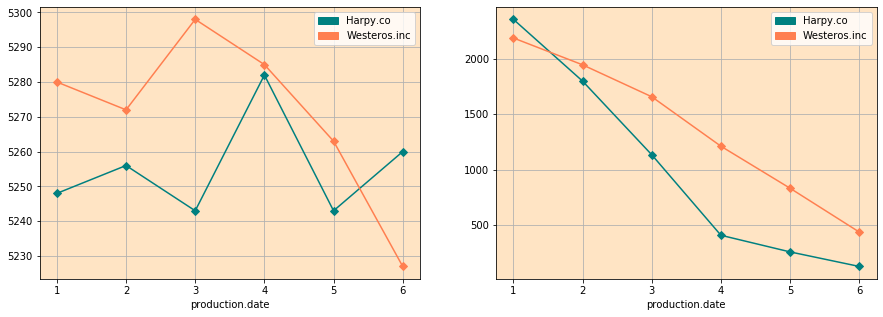

In [6]:
harpy_mpr = harpy_df.drop(columns=['unsullen.id', 'report.date']).groupby(['production.date']).sum()
westeros_mpr = westeros_df.drop(columns=['unsullen.id', 'report.date']).groupby(['production.date']).sum()

print(pd.DataFrame({'Harpy.co prod':harpy_mpr.produced.tolist(), 'Westeros.inc prod':westeros_mpr.produced.tolist(),
                    'Harpy.co def' :harpy_mpr.defects.tolist(),  'Westeros.inc def' :westeros_mpr.defects.tolist()}))

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.set(facecolor='bisque')
ax2.set(facecolor='bisque')
h_patch = mpatches.Patch(color='teal', label='Harpy.co')
w_patch = mpatches.Patch(color='coral', label='Westeros.inc')
harpy_mpr.drop(columns=['defects']).plot.line(ax=ax1, color='teal', marker='D', grid=True)
westeros_mpr.drop(columns=['defects']).plot.line(ax=ax1, color='coral', marker='D', grid=True)
harpy_mpr.drop(columns=['produced']).plot.line(ax=ax2, color='teal', marker='D', grid=True)
westeros_mpr.drop(columns=['produced']).plot.line(ax=ax2, color='coral', marker='D', grid=True)
ax1.legend(handles=[h_patch, w_patch])
ax2.legend(handles=[h_patch, w_patch])
plt.show()

## 3. Среднее количество сломанной продукции после каждого месяца

  Harpy_adpm Westeros_adpm
1        130           447
2        134           413
3        130           376
4        760           356
5        645           334
6        537           281


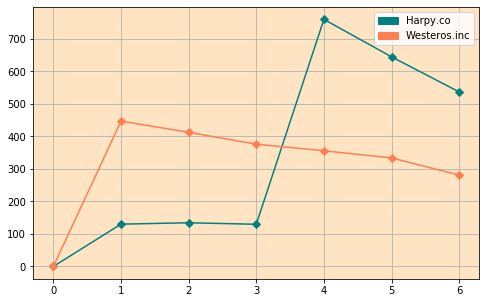

In [7]:
harpy_adpm = harpy_df.drop(columns=['unsullen.id', 'produced'])
harpy_adpm['report.date'] -= harpy_adpm['production.date']
harpy_adpm = harpy_adpm.groupby(['production.date', 'report.date'], as_index=False).sum()
harpy_adpm = harpy_adpm.drop(['production.date'], axis=1).groupby(['report.date'], as_index=False).mean()
harpy_adpm = harpy_adpm.drop(['report.date'], axis=1)
westeros_adpm = westeros_df.drop(columns=['unsullen.id', 'produced'])
westeros_adpm['report.date'] -= westeros_adpm['production.date']
westeros_adpm = westeros_adpm.groupby(['production.date', 'report.date'], as_index=False).sum()
westeros_adpm = westeros_adpm.drop(['production.date'], axis=1).groupby(['report.date'], as_index=False).mean()
westeros_adpm = westeros_adpm.drop(['report.date'], axis=1)

print(pd.DataFrame({'Harpy_adpm':harpy_adpm['defects'].apply(a0), 
                    'Westeros_adpm':westeros_adpm['defects'].apply(a0)}).drop([0]))

fig, ax = plt.subplots(1, figsize = (8,5))
ax.set(facecolor='bisque')
harpy_adpm.plot.line(ax=ax, color='teal', marker='D', grid=True)
westeros_adpm.plot.line(ax=ax, color='coral', marker='D', grid=True)
ax.legend(handles=[h_patch, w_patch])
plt.show()

## 4. Оценка работы кузнецов каждой из компаний

In [8]:
harpy_upr = harpy_df.drop(['report.date', 'production.date'], axis=1).rename({'unsullen.id':'Harpy.co unsullen.id'}, axis=1).groupby(['Harpy.co unsullen.id']).sum()
harpy_upr['work accuracy'] = (100-harpy_upr['defects']/harpy_upr['produced']*100).astype('float').apply(a2)
harpy_upr

,produced,defects,work accuracy
Harpy.co unsullen.id,,,
1.0,633.0,120.0,81.04
2.0,625.0,122.0,80.48
3.0,621.0,117.0,81.16
4.0,633.0,119.0,81.20
5.0,634.0,127.0,79.97
6.0,630.0,120.0,80.95
7.0,626.0,112.0,82.11
8.0,629.0,127.0,79.81
9.0,631.0,129.0,79.56


In [9]:
westeros_upr = westeros_df.drop(['report.date', 'production.date'], axis=1).rename({'unsullen.id':'Westeros.inc unsullen.id'}, axis=1).groupby(['Westeros.inc unsullen.id']).sum()
westeros_upr['work accuracy'] = (100-westeros_upr['defects']/westeros_upr['produced']*100).apply(a2)
westeros_upr

,produced,defects,work accuracy
Westeros.inc unsullen.id,,,
51.0,623.0,164.0,73.68
52.0,631.0,158.0,74.96
53.0,645.0,161.0,75.04
54.0,640.0,163.0,74.53
55.0,632.0,169.0,73.26
56.0,635.0,158.0,75.12
57.0,622.0,141.0,77.33
58.0,635.0,184.0,71.02
59.0,628.0,177.0,71.82


Лучшие работники компаний

In [10]:
harpy_upr[harpy_upr['work accuracy'] == (harpy_upr['work accuracy']).max()]

,produced,defects,work accuracy
Harpy.co unsullen.id,,,
24.0,635.0,103.0,83.78


In [11]:
westeros_upr[westeros_upr['work accuracy'] == (westeros_upr['work accuracy']).max()]

,produced,defects,work accuracy
Westeros.inc unsullen.id,,,
57.0,622.0,141.0,77.33


Худшие работники компаний

In [12]:
harpy_upr[harpy_upr['work accuracy'] == (harpy_upr['work accuracy']).min()]

,produced,defects,work accuracy
Harpy.co unsullen.id,,,
37.0,626.0,143.0,77.16


In [13]:
westeros_upr[westeros_upr['work accuracy'] == (westeros_upr['work accuracy']).min()]

,produced,defects,work accuracy
Westeros.inc unsullen.id,,,
65.0,635.0,188.0,70.39
